In [1]:
%%debug

UsageError: %%debug is a cell magic, but the cell body is empty. Did you mean the line magic %debug (single %)?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#!pip3 install quickda

In [3]:
testdata = pd.read_csv("/content/drive/MyDrive/Classification_predict_grade/Test_data.csv")
traindata= pd.read_csv("/content/drive/MyDrive/Classification_predict_grade/Train_data.csv")
federaldata = pd.read_csv("/content/drive/MyDrive/Classification_predict_grade/Federation Data.csv")
worldgdp = pd.read_csv("/content/drive/MyDrive/Classification_predict_grade/world_gdp.csv")
worldpop = pd.read_csv("/content/drive/MyDrive/Classification_predict_grade/world_pop.csv")

In [4]:
traindata.dtypes

Sex            object
Age           float64
Height        float64
Weight        float64
Team           object
Federation     object
Event          object
Year            int64
Season         object
City           object
Sub Event      object
Grade          object
Id             object
GameID         object
Game           object
Record_Id      object
dtype: object

In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90725 entries, 0 to 90724
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         90725 non-null  object 
 1   Age         87551 non-null  float64
 2   Height      70842 non-null  float64
 3   Weight      69933 non-null  float64
 4   Team        90725 non-null  object 
 5   Federation  90725 non-null  object 
 6   Event       90725 non-null  object 
 7   Year        90725 non-null  int64  
 8   Season      90725 non-null  object 
 9   City        90725 non-null  object 
 10  Sub Event   90725 non-null  object 
 11  Grade       90725 non-null  object 
 12  Id          90725 non-null  object 
 13  GameID      90725 non-null  object 
 14  Game        90725 non-null  object 
 15  Record_Id   90725 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 11.1+ MB


In [6]:
traindata.head()

,Sex,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id
0,M,31.0,188.0,138.0,Bulgaria,BUL,2016 Summer,2016,down,Rio de Janeiro,Athletics Men's Shot Put,D+,candidate-40730,Game 1,Athletics,5da57331-62fe-418b-abfd-ca6ab0731709
1,F,28.0,166.0,62.0,Chinese Taipei,TPE,1996 Summer,1996,down,Atlanta,Table Tennis Women's Singles,D+,candidate-129936,Game 33,Table Tennis,0ae393f7-5e07-4b7c-b0cd-83edf259a069
2,M,30.0,NaN,NaN,Sweden,SWE,1960 Summer,1960,down,Roma,Rowing Men's Coxed Fours,D+,candidate-109667,Game 7,Rowing,3fec3204-ca6d-476f-ab89-e1189bc0eb35
3,F,28.0,181.0,80.0,China,CHN,2004 Summer,2004,down,Athina,Handball Women's Handball,D+,candidate-131637,Game 24,Handball,96cd09eb-b394-4c7d-8f7d-b3a0dc8cd870
4,F,16.0,175.0,54.0,Hungary,HUN,1996 Summer,1996,down,Atlanta,Swimming Women's 4 x 100 metres Medley Relay,D+,candidate-29360,Game 3,Swimming,bc158ecb-2fc5-4ffa-abd3-1075f4196044


In [79]:
# traindata.drop(['Record_Id','Sub Event'] , axis=1, inplace=True)

In [80]:
gameid = traindata.groupby(['Federation', 'GameID'])
dataframe=gameid.first()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d896a2250>,
      dtype=object)

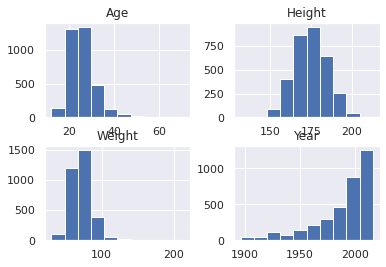

In [81]:
dataframe.hist()

In [82]:
# traindata['Sub Event'].value_counts()

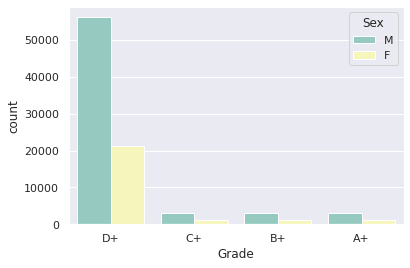

In [83]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Grade", hue="Sex", data=traindata , palette="Set3")

In [84]:
worldgdp_new = worldgdp.rename(columns=worldgdp.iloc[2]).drop(worldgdp.index[[0,1,2]])
# worldgdp_new.drop(index=worldgdp_new.index[0], axis=0, inplace=True)

In [85]:
# worldgdp_new.columns = worldgdp_new.columns.str.replace(r'.0$', '')

In [86]:
worldgdp_new.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
5,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,3.852116e+09,4.257219e+09,4.863487e+09,5.077222e+09,6.761786e+09,8.715106e+09,1.320971e+10,1.555793e+10,1.772835e+10,2.097190e+10,2.636449e+10,3.324342e+10,4.234528e+10,4.434867e+10,4.520709e+10,4.880137e+10,5.369828e+10,5.793787e+10,6.369630e+10,6.674227e+10,5.908907e+10,5.563149e+10,6.204510e+10,4.571537e+10,4.800330e+10,4.994646e+10,4.254257e+10,4.176405e+10,4.694150e+10,4.817786e+10,4.818775e+10,4.864057e+10,5.479025e+10,5.474471e+10,5.676029e+10,6.786383e+10,8.532500e+10,1.031980e+11,1.170270e+11,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
6,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.140000e+08,5.270000e+08,5.120000e+08,5.030000e+08,4.960000e+08,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
7,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [87]:
worldgdp_new = pd.melt(worldgdp_new, 
            id_vars='Country Code', 
            value_vars=list(worldgdp_new.columns[4:]), # list of days of the week
            var_name='Years', 
            value_name='GDP')

In [88]:
worldgdp_new['GDP_In_Billion'] = worldgdp_new['GDP'].div(1000000000)
worldgdp_new

,Country Code,Years,GDP,GDP_In_Billion
0,AFG,1960,5.377778e+08,0.537778
1,ALB,1960,NaN,NaN
2,DZA,1960,2.723649e+09,2.723649
3,ASM,1960,NaN,NaN
4,AND,1960,NaN,NaN
...,...,...,...,...
12478,VIR,2016,NaN,NaN
12479,PSE,2016,1.339710e+10,13.397100
12480,YEM,2016,2.731761e+10,27.317605
12481,ZMB,2016,2.106399e+10,21.063990


In [89]:
worldpop.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277,89005,90853,92898,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999,19403676,20093756,20966463,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318,15949766,16440924,16983266,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530,3108778,3089027,3060173,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142,64370,65390,67341,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [90]:
worldpop_new = pd.melt(worldpop, 
            id_vars='Country Code', 
            value_vars=list(worldpop.columns[4:]), # list of days of the week
            var_name='Years', 
            value_name='Total_Population')

In [109]:
worldpop_new.rename(columns={'Country Code': "Country_Code"})

,Country_Code,Years,Total_Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0
...,...,...,...
12364,XKX,2016,1816200.0
12365,YEM,2016,27584213.0
12366,ZAF,2016,55908865.0
12367,ZMB,2016,16591390.0


In [92]:
worldpop_new.Years = worldpop_new.Years.astype('object')

How different is the participation and performance of female candidates from federations in various events, game ID etc?

In [102]:
worldpop_new.dtypes

Country Code         object
Years                object
Total_Population    float64
dtype: object

In [112]:
train_gdp_data = pd.merge(traindata, worldgdp_new,  how='left', left_on=['Federation','Year'], right_on = ['Country Code','Years'])
train_gdp_data.Year = train_gdp_data.Year.astype('object')

In [113]:
train_gdp_pop_data = pd.merge(train_gdp_data, worldpop_new,  how='left', left_on=['Federation','Year'], right_on = ['Country_Code','Years'])

KeyError: ignored

In [96]:
train_gdp_pop_data.shape

(90725, 21)

In [105]:
train_gdp_pop_data.head()

,Sex,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id,Country Code_x,Years_x,GDP,GDP_In_Billion,Country Code_y,Years_y,Total_Population
0,M,31.0,188.0,138.0,Bulgaria,BUL,2016 Summer,2016,down,Rio de Janeiro,Athletics Men's Shot Put,D+,candidate-40730,Game 1,Athletics,5da57331-62fe-418b-abfd-ca6ab0731709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,28.0,166.0,62.0,Chinese Taipei,TPE,1996 Summer,1996,down,Atlanta,Table Tennis Women's Singles,D+,candidate-129936,Game 33,Table Tennis,0ae393f7-5e07-4b7c-b0cd-83edf259a069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,30.0,NaN,NaN,Sweden,SWE,1960 Summer,1960,down,Roma,Rowing Men's Coxed Fours,D+,candidate-109667,Game 7,Rowing,3fec3204-ca6d-476f-ab89-e1189bc0eb35,SWE,1960,1.484287e+10,14.842870,NaN,NaN,NaN
3,F,28.0,181.0,80.0,China,CHN,2004 Summer,2004,down,Athina,Handball Women's Handball,D+,candidate-131637,Game 24,Handball,96cd09eb-b394-4c7d-8f7d-b3a0dc8cd870,CHN,2004,1.955350e+12,1955.350000,NaN,NaN,NaN
4,F,16.0,175.0,54.0,Hungary,HUN,1996 Summer,1996,down,Atlanta,Swimming Women's 4 x 100 metres Medley Relay,D+,candidate-29360,Game 3,Swimming,bc158ecb-2fc5-4ffa-abd3-1075f4196044,HUN,1996,4.665980e+10,46.659797,NaN,NaN,NaN


In [98]:
train_gdp_data[train_gdp_data['Federation'] == 'AFG'].head()

,Sex,Age,Height,Weight,Team,Federation,Event,Year,Season,City,Sub Event,Grade,Id,GameID,Game,Record_Id,Country Code,Years,GDP,GDP_In_Billion
1111,M,NaN,NaN,NaN,Afghanistan,AFG,1988 Summer,1988,down,Seoul,"Wrestling Men's Light-Flyweight, Freestyle",D+,candidate-89866,Game 10,Wrestling,1716522a-e553-4735-8608-8fbdbcbf10c4,AFG,1988,NaN,NaN
2772,M,35.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936,down,Berlin,Hockey Men's Hockey,D+,candidate-111666,Game 18,Hockey,e9f1ef99-e3d7-4cd8-96de-e52b35331bb9,NaN,NaN,NaN,NaN
3688,M,20.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964,down,Tokyo,"Wrestling Men's Featherweight, Greco-Roman",D+,candidate-94570,Game 10,Wrestling,d2177b00-260d-4569-ba9a-5a9631fa84fa,AFG,1964,8.000000e+08,0.800000
5050,M,22.0,172.0,70.0,Afghanistan,AFG,1960 Summer,1960,down,Roma,Athletics Men's 4 x 100 metres Relay,D+,candidate-435,Game 1,Athletics,bb9fec9d-18a3-471f-8865-27c00233ec2a,AFG,1960,5.377778e+08,0.537778
5390,M,21.0,176.0,78.0,Afghanistan,AFG,1968 Summer,1968,down,Mexico City,"Wrestling Men's Welterweight, Freestyle",D+,candidate-68450,Game 10,Wrestling,3e5ef7cf-0d0f-4d00-b7e8-d728d368dca2,AFG,1968,1.373333e+09,1.373333


In [99]:
train_gdp_pop_data.drop(['Record_Id','Id','Sub Event','GDP','Country Code_x','Years_x','Country Code_y','Years_y'] , axis=1, inplace=True)

KeyError: ignored

In [ ]:
train_gdp_pop_data.Total_Population.isnull().sum()

Study factors that affect Grades of a federation in accordance with GDP and population as well (Hint: Higher population can be related to higher talent pool from where candidates can be selected)


Which federation has the most performing candidates? What aspects of GDP and Population differ from other federations?

What are the best performing events for these federations? 


What are the commonalities between federations?